# Elecciones 2021 PASO

El siguiente notebook es en el contexto de las elecciones de medio termino del 2021 en Argentina,
dentro del proyecto de [https://data.digital](https://data.sobre.digital/)


## Datos
La metadata se puede ver https://data.sobre.digital/

**WIP**

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()
df = pd.read_csv("https://data.sobre.digital/datasets/sobre_digital_votos_20210902_130701_v1.csv", index_col=False)
df.head()

,id,ip_hash,sentiment,user_agent,gender,age,first_access,created_at,updated_at,district,alternative,party
0,39cfbed82ea28da6,d63062acf04c0859,me enoja,Mozilla/5.0 (Linux; Android 8.1.0; SM-J710MN) ...,Femenino,19,2021-09-01 18:33:55,2021-09-01T03:14:49.218554,2021-09-01T18:35:16.134012,PBA,a,Avanza Libertad
1,c62024ed50de49b3,d63062acf04c0859,me da lo mismo,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Mujer transexual,None,2021-08-31 20:55:55,2021-08-31T18:38:11.286975,2021-08-31T20:56:27.971138,CABA,a,Frente de Izquierda
2,2c54ec8da39e22c0,d63062acf04c0859,me da ganas de romper todo,Mozilla/5.0 (Linux; Android 10; M2004J19C) App...,Bigénero,25,2021-08-31 21:24:47,2021-08-31T18:38:11.286975,2021-08-31T21:25:12.662793,CABA,a,anular
3,e8fc1340a50ee93f,d63062acf04c0859,me aburre,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,Masculino,None,2021-09-01 18:51:40,2021-09-01T03:14:49.218554,2021-09-01T18:52:56.522961,CABA,a,Alternativa Ciudadana
4,e3ba881aaf50619a,d63062acf04c0859,me da lo mismo,Mozilla/5.0 (iPhone; CPU iPhone OS 13_2_3 like...,Mujer transexual,17,2021-09-01 13:27:03,2021-09-01T03:14:49.218554,2021-09-01T13:51:46.870310,CABA,a,Frente de Izquierda


In [16]:
df.groupby("party").party.count()

party
Alternativa Ciudadana            1
Ausente                          2
Autodeterminacion y Libertad     2
Avanza Libertad                  4
En blanco                        6
Frente de Izquierda             17
Frente de Todos                 32
Juntos por el Cambio            16
La Libertad Avanza               3
Nuevo Mas                        1
Politica Obrera                  2
Vamos con Vos                    1
anular                           2
Name: party, dtype: int64

<AxesSubplot:ylabel='party'>

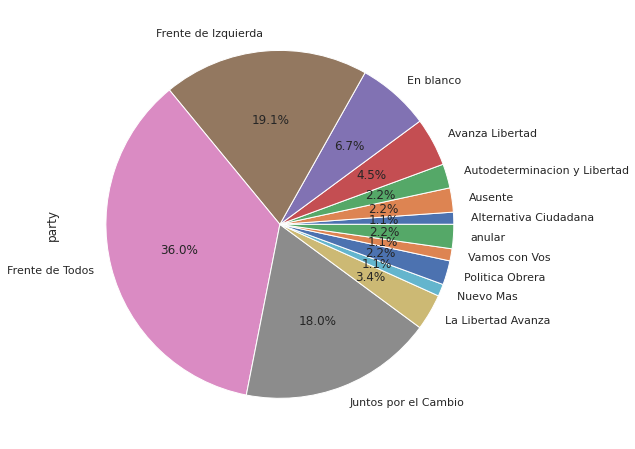

In [80]:
df.groupby("party").party.count().plot.pie(autopct="%.1f%%",figsize=(8,8))

<AxesSubplot:ylabel='sentiment'>

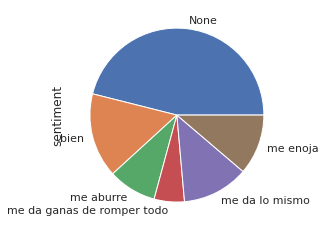

In [21]:
df.groupby("sentiment").sentiment.count().plot.pie()

<AxesSubplot:ylabel='sentiment'>

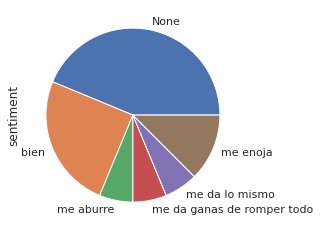

In [40]:
df.where(df["party"] == "Frente de Todos").groupby("sentiment").sentiment.count().plot.pie()

## Ejemplo de como trabajar con user_agent


In [50]:
!pip install pyyaml ua-parser user-agents
from user_agents import parse

case = df["user_agent"].iloc[0]
print("Example: ", df["user_agent"].iloc[0])
print(parse(case).browser.family)
print(parse(case).device.family)
print(parse(case).is_pc)
print(parse(case).is_mobile)

Example:  Mozilla/5.0 (Linux; Android 8.1.0; SM-J710MN) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.105 Mobile Safari/537.36
Chrome Mobile
Samsung SM-J710MN
False
True


In [62]:
phones = df.user_agent.apply(lambda x: parse(x).device.family.split(" ")[0])
df["phones"] = phones
phones.unique()

array(['Samsung', 'Other', 'M2004J19C', 'iPhone', 'Mac', 'XiaoMi', 'moto',
       'Generic', 'G3123', 'Huawei', 'LG-M700', 'ZTE', 'motorola', 'Moto',
       'Lumia', 'Pixel', 'Android', '5033A', 'LM-X420'], dtype=object)

<AxesSubplot:ylabel='phones'>

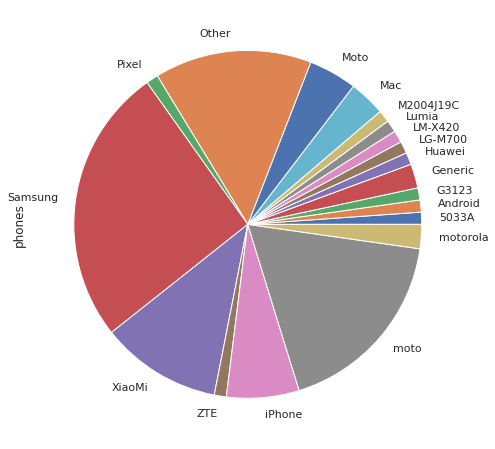

In [78]:
df.groupby("phones").phones.count().plot.pie(figsize=(8,8))

<AxesSubplot:ylabel='phones'>

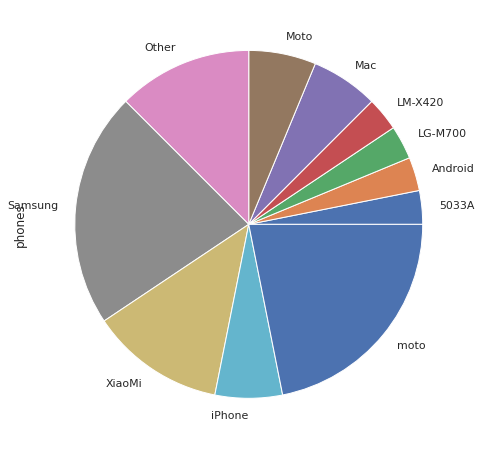

In [77]:
df.where(df["party"] == "Frente de Todos").groupby("phones").phones.count().plot.pie(figsize=(8,8))

<AxesSubplot:ylabel='phones'>

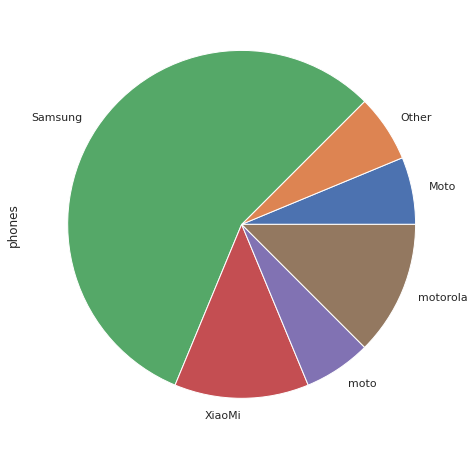

In [81]:
df.where(df["party"] == "Juntos por el Cambio").groupby("phones").phones.count().plot.pie(figsize=(8,8))